In [4]:


# Standard library imports
import warnings

# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistics and data preprocessing
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Machine learning libraries
from sklearn.cluster import KMeans
from sklearn.metrics import (
    pairwise_distances, 
    mean_absolute_error, 
    mean_squared_error, 
    r2_score
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (
    GridSearchCV, 
    train_test_split, 
    KFold, 
    cross_val_score
)
from mpl_toolkits.mplot3d import Axes3D

# Miscellaneous settings
warnings.filterwarnings('ignore')
%matplotlib inline
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Import CSV files in here


In [8]:
# Import files here;

# Using absolute paths
file_1 = r"C:\Users\kaan\Documents\Thesis Data\Exp_004_Multiple_shapes\Area_CSV_file_test_004_ShapeTEst_KY\Area_cm2_multi_roi_test_004_ShapeTEst_KY.csv"

# Read the files
combined_df = pd.read_csv(file_1)

# Check shapes (note: shape is a property, not a method)




## Remove all zeros from an array and outliers


Removed 1 rows where all area columns are 0 (0.00% of data)

Zero values replaced with NaN in each column:
  - cross_area_cm2: 31411 zeros replaced (97.02% of values)
  - donut_area_cm2: 102 zeros replaced (0.32% of values)
  - cross_area_cm2.1: 26823 zeros replaced (82.85% of values)
  - square_hole_area_cm2: 771 zeros replaced (2.38% of values)
  - square_area_cm2: 1472 zeros replaced (4.55% of values)
  - circle_area_cm2: 23254 zeros replaced (71.83% of values)

Total zero values replaced with NaN: 83833

Final data shape after removing zeros and replacing with NaN: (32375, 14)
Removed a total of 1 rows


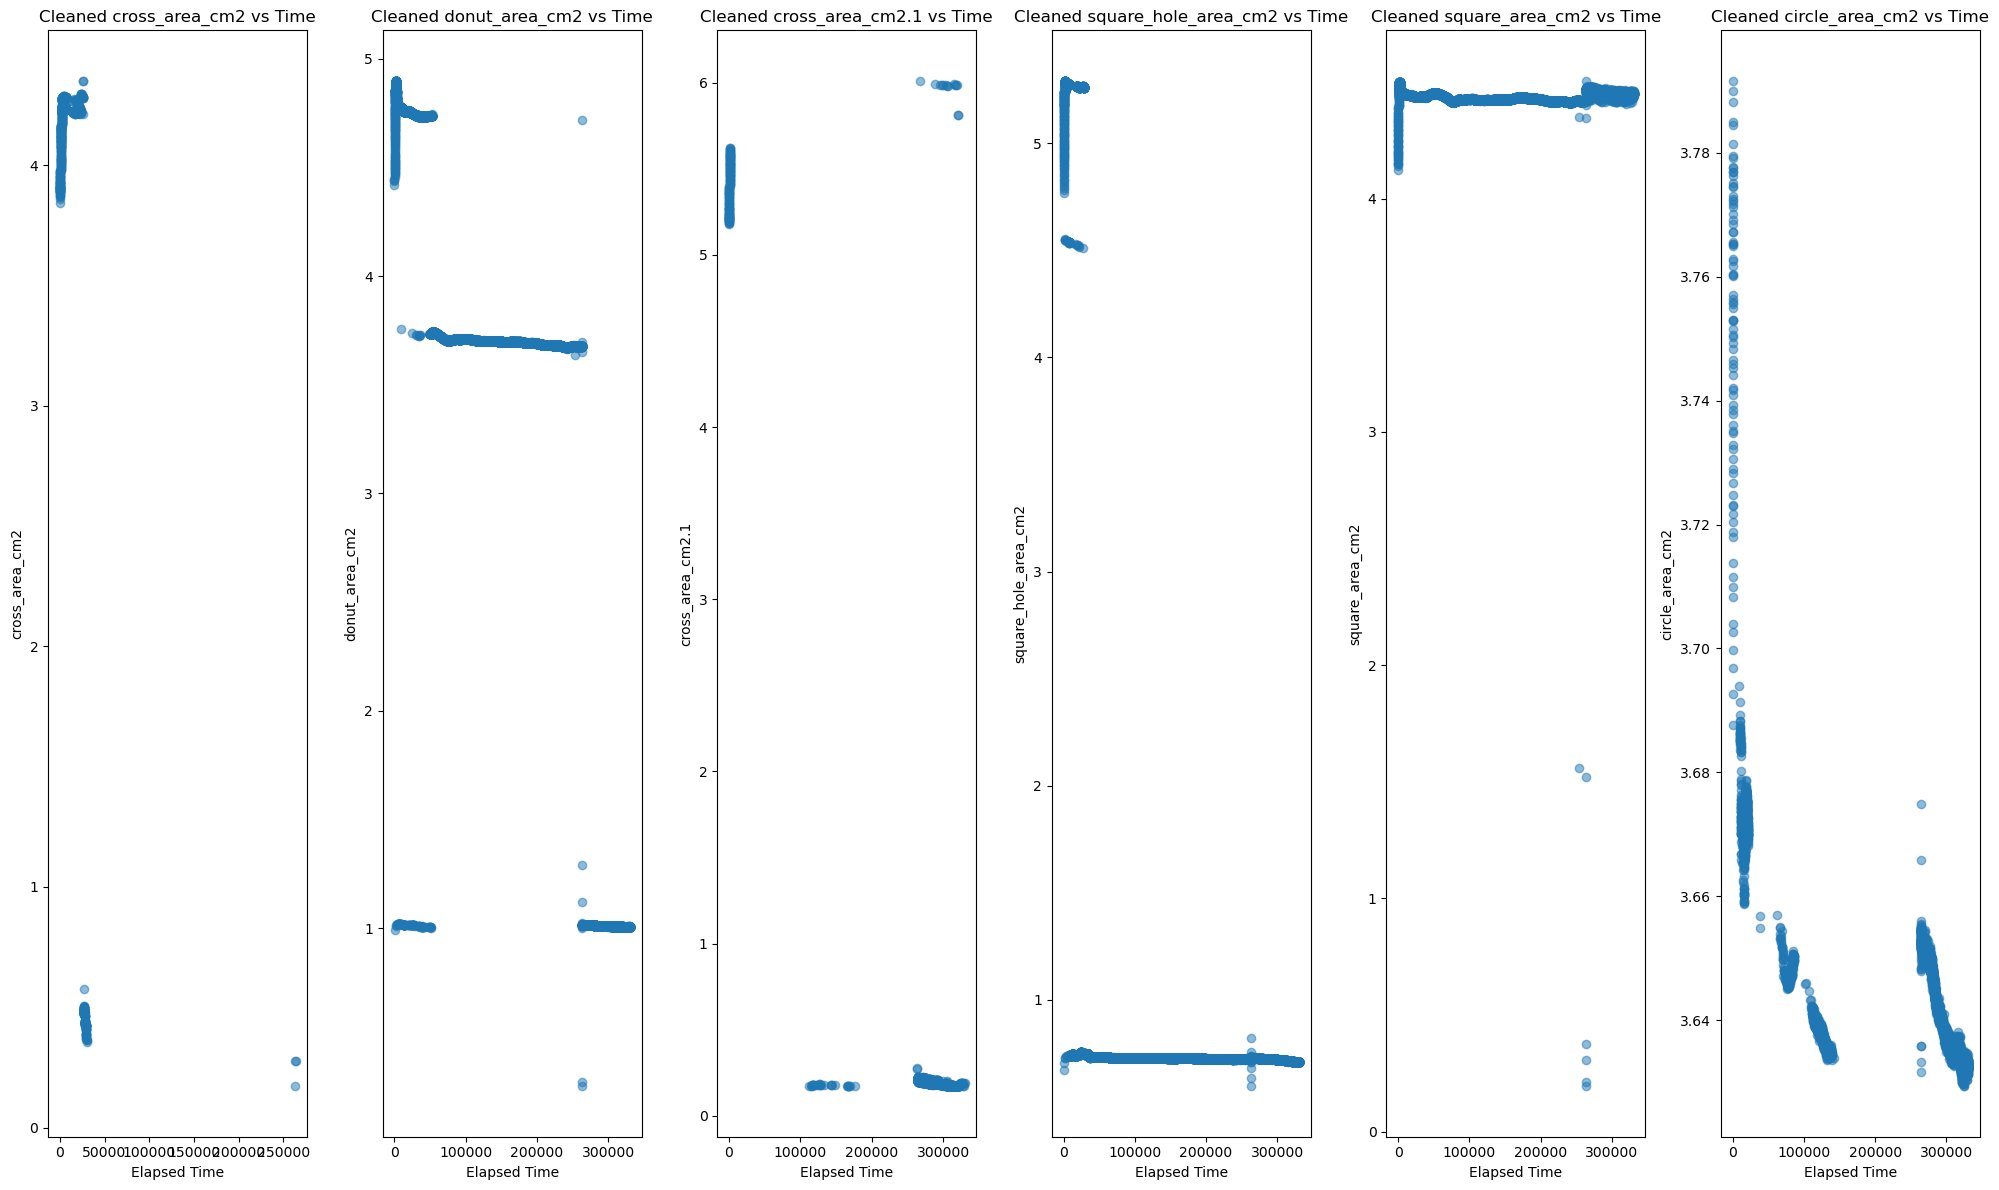

In [9]:
# 1. Remove rows where both time and area are 0
# Assuming your columns are named 'elapsed_time' and there's an area column
# You may need to adjust the column names based on your actual data
area_columns = [col for col in combined_df.columns if 'area_' in col.lower() or 'cm2' in col.lower()]

# First approach: Remove rows where ALL area columns are 0
zeros_mask = combined_df[area_columns].eq(0).all(axis=1)
df_no_zeros = combined_df[~zeros_mask].reset_index(drop=True)
print(f"\nRemoved {zeros_mask.sum()} rows where all area columns are 0 ({zeros_mask.sum()/len(combined_df)*100:.2f}% of data)")

# Convert ANY 0 values in area columns to NaN, treating each column independently
df_clean = df_no_zeros.copy()
zero_counts = {}

for area_col in area_columns:
    # Count zeros in this column before replacement
    zero_count = (df_clean[area_col] == 0).sum()
    zero_counts[area_col] = zero_count
    
    # Replace zeros with NaN in this specific column
    df_clean[area_col] = df_clean[area_col].replace(0, np.nan)

# Print summary of zero replacements
print("\nZero values replaced with NaN in each column:")
for area_col, count in zero_counts.items():
    print(f"  - {area_col}: {count} zeros replaced ({count/len(df_clean)*100:.2f}% of values)")
    
print(f"\nTotal zero values replaced with NaN: {sum(zero_counts.values())}")

# 2. Remove outliers using the IQR method for each area column
# (Your commented code for outlier removal can be uncommented if needed)
# for area_col in area_columns:
#     # Calculate Q1, Q3, and IQR
#     Q1 = df_clean[area_col].quantile(0.25)
#     Q3 = df_clean[area_col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define outlier bounds (typically 1.5 * IQR)
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Create a mask for non-outliers
#     outlier_mask = (df_clean[area_col] < lower_bound) | (df_clean[area_col] > upper_bound)
    
#     # Print information about outliers
#     outlier_count = outlier_mask.sum()
#     print(f"\nColumn {area_col}:")
#     print(f"  - Q1: {Q1:.4f}, Q3: {Q3:.4f}, IQR: {IQR:.4f}")
#     print(f"  - Lower bound: {lower_bound:.4f}, Upper bound: {upper_bound:.4f}")
#     print(f"  - Outliers detected: {outlier_count} ({outlier_count/len(df_clean)*100:.2f}%)")
    
#     # Remove outliers
#     df_clean = df_clean[~outlier_mask].reset_index(drop=True)


# Final results
print("\nFinal data shape after removing zeros and replacing with NaN:", df_clean.shape)
print("Removed a total of", combined_df.shape[0] - df_clean.shape[0], "rows")

# Visualize the cleaned data
plt.figure(figsize=(20, 12))
for i, area_col in enumerate(area_columns):
    plt.subplot(1, len(area_columns), i+1)
    plt.scatter(df_clean['elapsed_time'], df_clean[area_col], alpha=0.5)
    plt.title(f'Cleaned {area_col} vs Time')
    plt.xlabel('Elapsed Time')
    plt.ylabel(area_col)

plt.tight_layout()
plt.show()









## Nicer Graphs


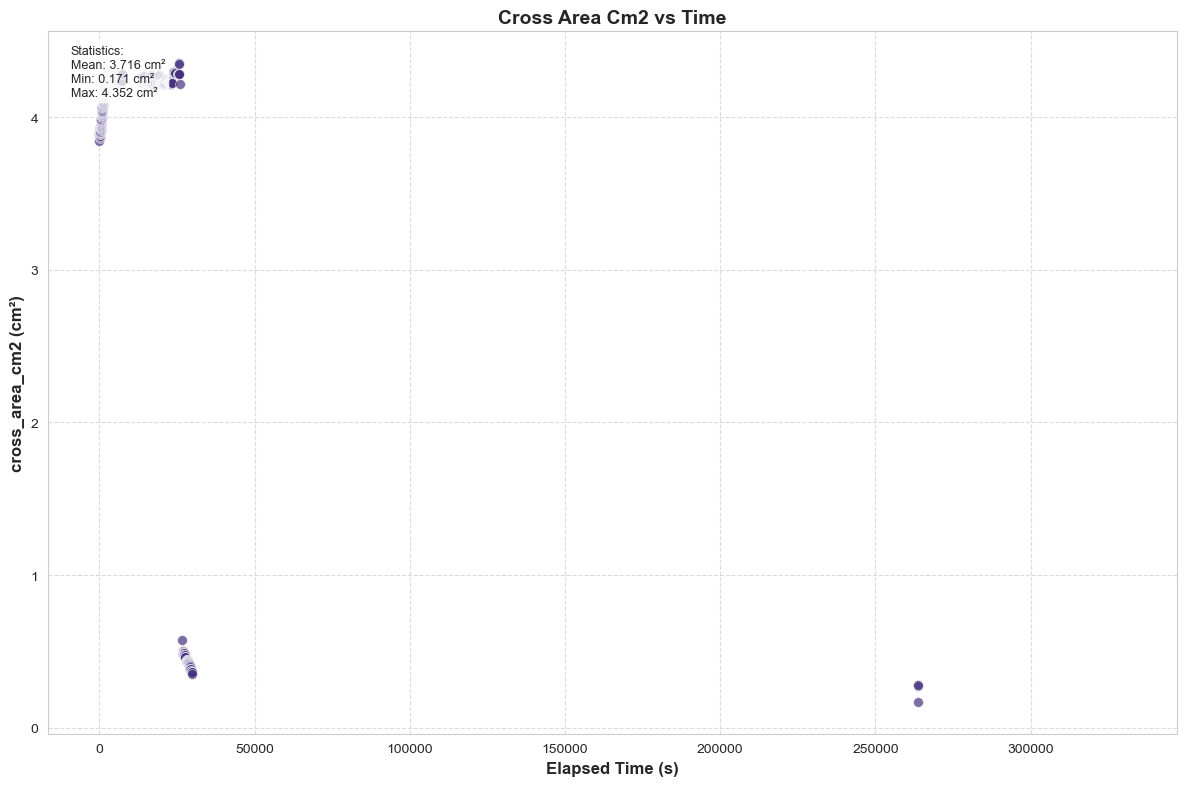

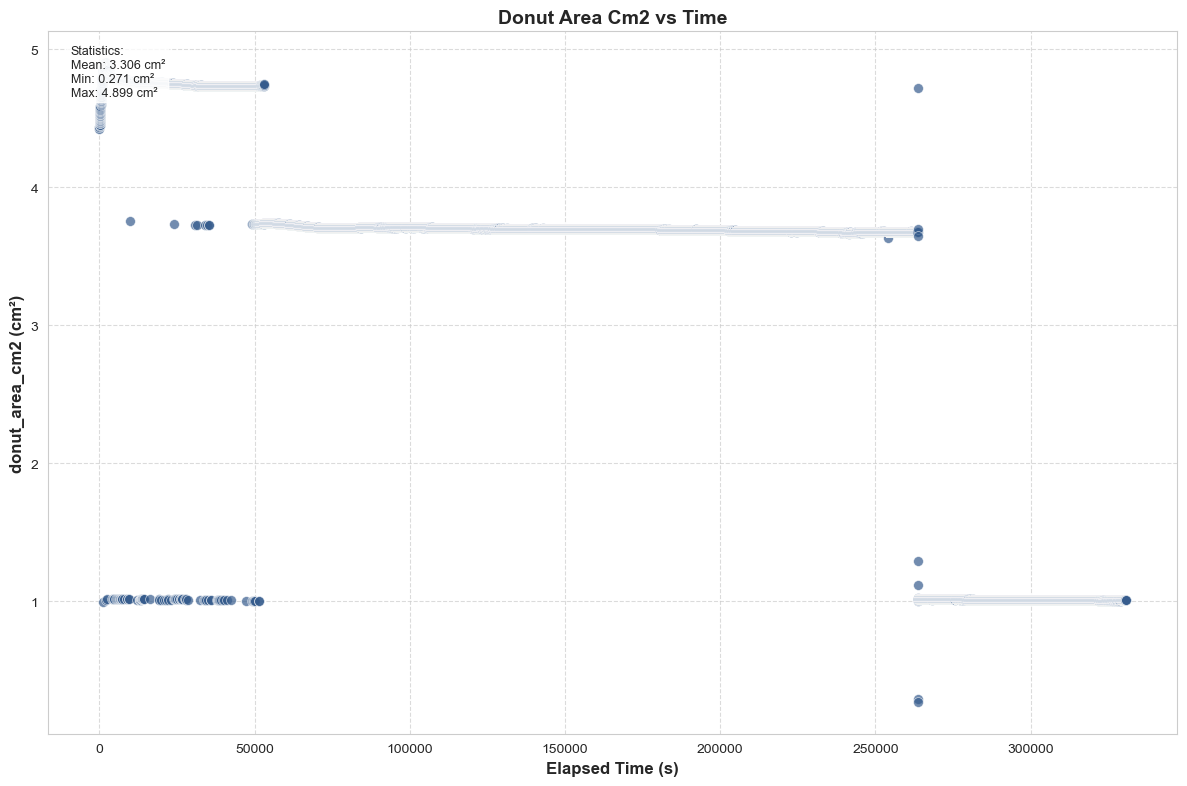

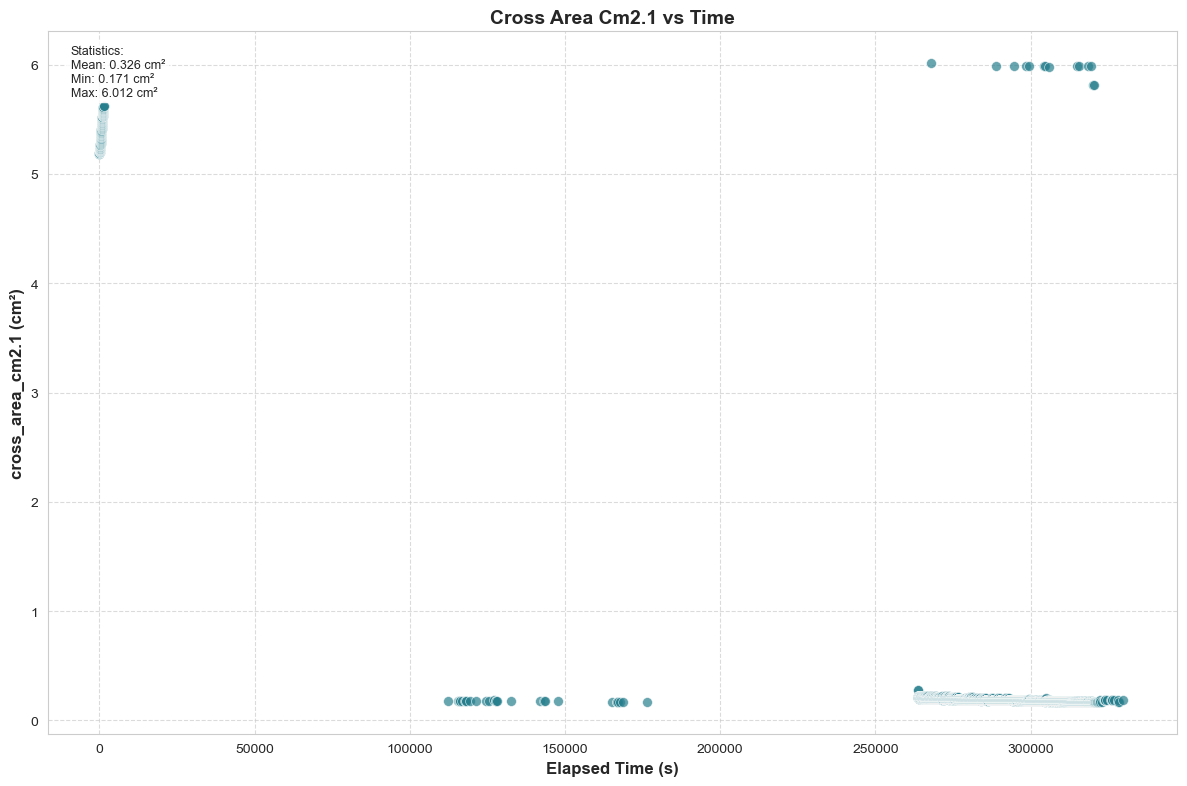

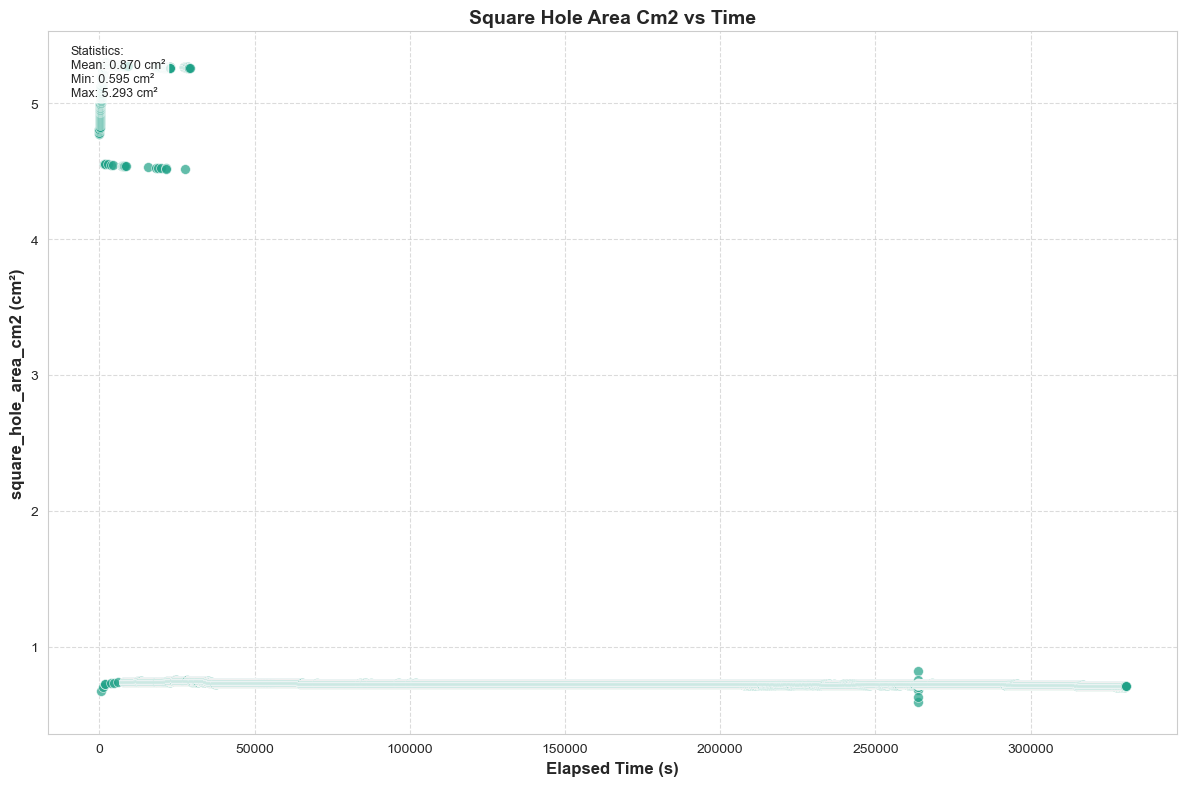

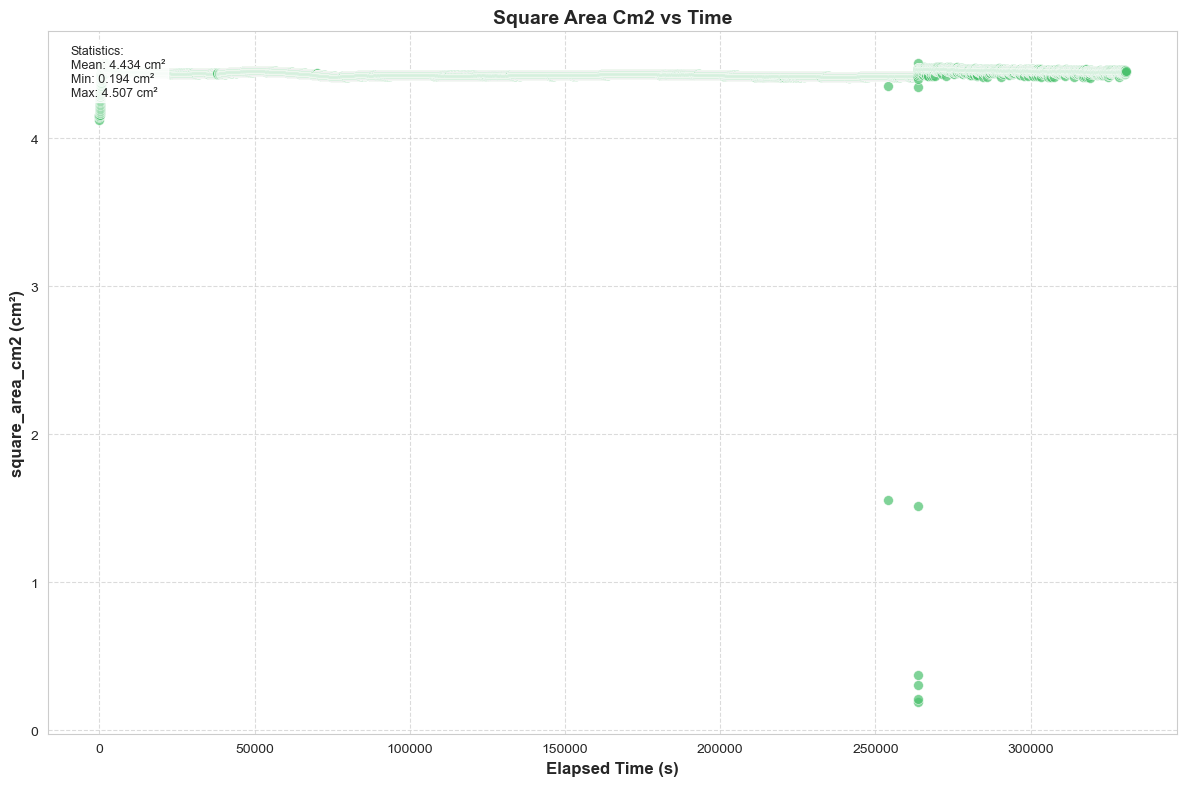

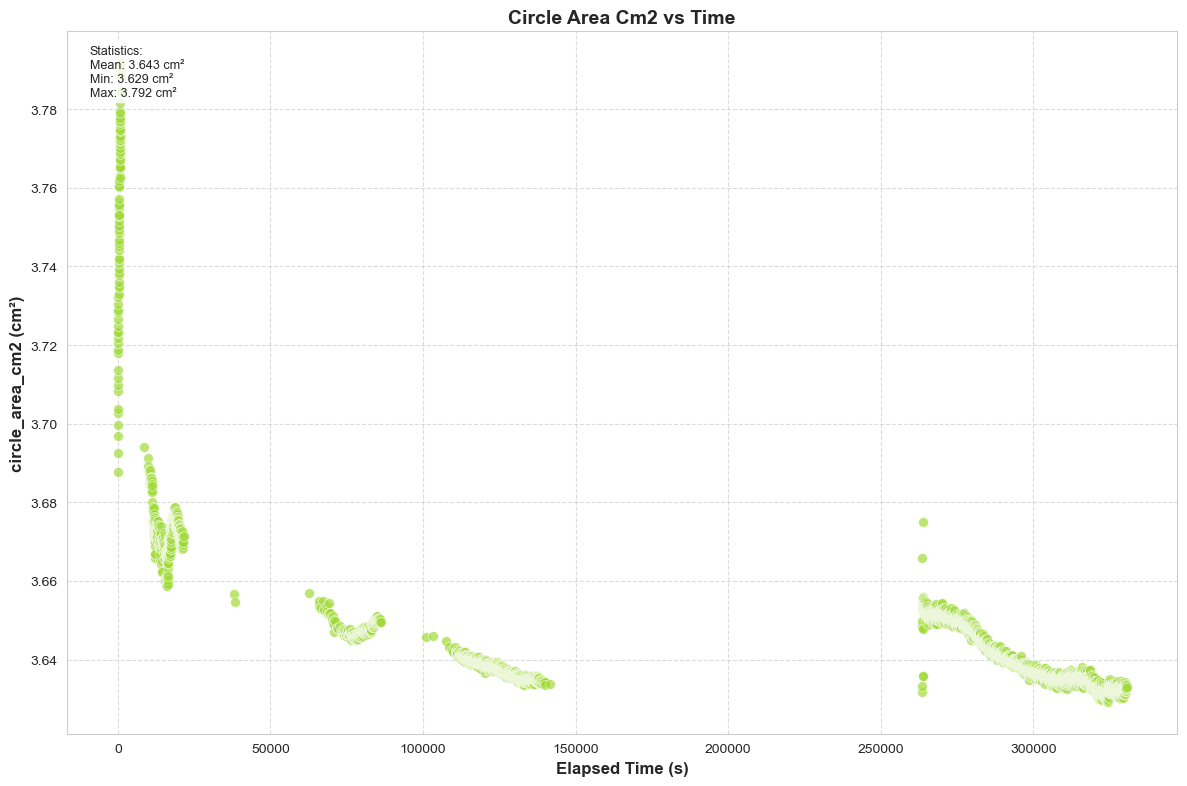


Separate plots have been generated and saved


In [ ]:
# Set the style for a more modern look
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10
})

# Create a color palette
colors = sns.color_palette("viridis", len(area_columns))

# Plot each area column separately
for area_col, color in zip(area_columns, colors):
    # Create new figure for each plot
    plt.figure(figsize=(12, 8))
    
    # Create scatter plot with improved styling
    scatter = plt.scatter(
        df_clean['elapsed_time'], 
        df_clean[area_col],
        alpha=0.7,
        s=50,  # Slightly larger point size
        edgecolor='w',  # White edge for better visibility
        linewidth=0.5,
        c=[color]
    )
    
    # Improve titles and labels
    plt.title(f'{area_col.replace("_", " ").title()} vs Time', fontweight='bold')
    plt.xlabel('Elapsed Time (s)', fontweight='bold')
    plt.ylabel(f'{area_col} (cm²)', fontweight='bold')
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Improve axis limits with some padding
    x_min, x_max = df_clean['elapsed_time'].min(), df_clean['elapsed_time'].max()
    x_padding = (x_max - x_min) * 0.05
    plt.xlim(x_min - x_padding, x_max + x_padding)
    
    # # Set y-limits (you can customize these for each plot)
    # if 'area_1' in area_col:
    #     plt.ylim(3.0, 4.5)
    # elif 'area_2' in area_col:
    #     plt.ylim(4.0, 5.5)
    # elif 'area_3' in area_col:
    #     plt.ylim(5.0, 7.2)
    
    # Add statistics annotation
    stats_text = (
        f"Statistics:\n"
        f"Mean: {df_clean[area_col].mean():.3f} cm²\n"
        f"Min: {df_clean[area_col].min():.3f} cm²\n"
        f"Max: {df_clean[area_col].max():.3f} cm²"
    )
    plt.text(0.02, 0.98, stats_text, 
            transform=plt.gca().transAxes, 
            fontsize=9, 
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Adjust layout
    plt.tight_layout()
    

    
    # Show the plot
    plt.show()
    
    # Close the figure to free memory
    plt.close()

print("\nSeparate plots have been generated and saved")